# TFY4165 Termisk fysikk, obligatorisk øving 2

## Mikael Bourmistrov

### Maxwellfordelingen

### Oppgave a)

<Figure size 432x288 with 0 Axes>

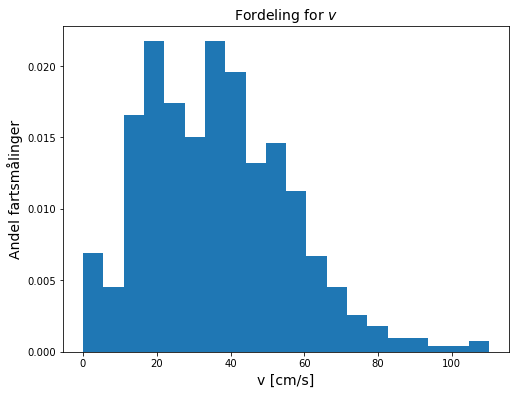

<Figure size 432x288 with 0 Axes>

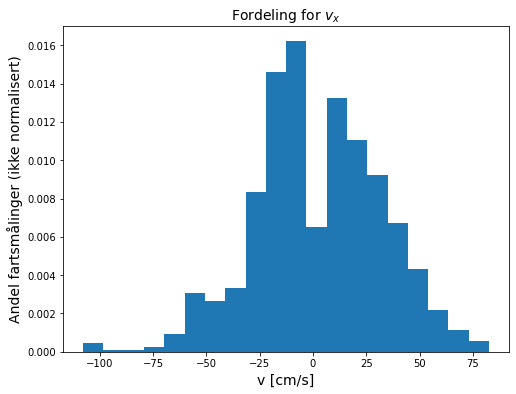

<Figure size 432x288 with 0 Axes>

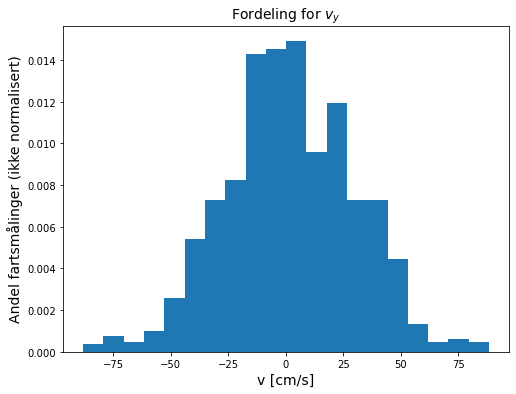

<Figure size 432x288 with 0 Axes>

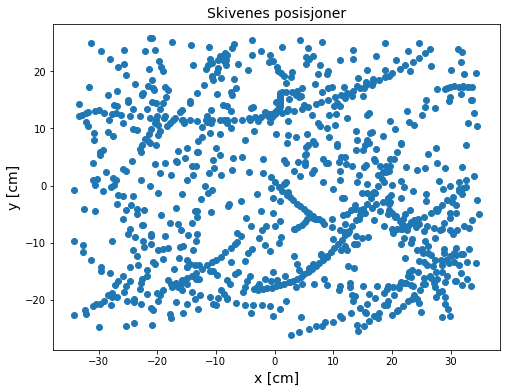

<Figure size 432x288 with 0 Axes>

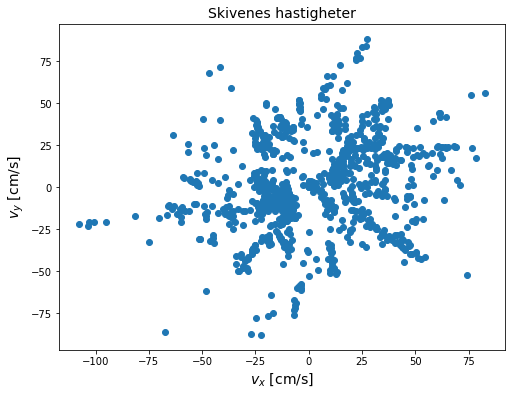

In [2]:
import numpy as np
import matplotlib.pyplot as plt

######### Reading file function #########
def turn_file_to_matrix(filename):                          # Her lager jeg en funksjon som leser fila og gir brukbare verdier
    matrix_values = []                           
    
    with open(filename) as file:
        temp_line = file.readline()
        
        while temp_line:                                     # Denne vil fortsette å lese linjer så lenge de "eksisterer".
            temp_line = file.readline()                      # Setter linja lest som "temporary line" 
            line_optimized = temp_line.strip().split("\t")   # "Optimaliserer" linja så vi kan sette det i en liste og få brukbare verdier.
            matrix_values.append(line_optimized)             
        return matrix_values[1:-1]                           # Grunnen jeg splitter matrisa slik, er at den inneholder [t, x, y] på første og '' på siste element, så de fjerner jeg.
                                                             
######### Solving for variables #########
x_tot, y_tot, v_x_tot, v_y_tot, v_tot = [], [], [], [], []

for i in range(1, 50):                                       # Itererer gjennom alle filene
    data_matrix = turn_file_to_matrix("mass8_" + str(i) + ".txt")
    N = len(data_matrix)
    
    x, y, t = np.zeros(N), np.zeros(N), np.zeros(N)
    v_x, v_y = np.zeros(N-1), np.zeros(N-1)
    
    for j in range(N):
        t[j] = (float(data_matrix[j][0]))
        x[j] = (float(data_matrix[j][1]) * 0.22)             # Ganger med 0.22 for å få enheten i cm.
        y[j] = (float(data_matrix[j][2]) * 0.22)             #
        
    for k in range(N - 1):
        dt = t[k+1] - t[k]
        v_x[k] = (x[k+1] - x[k])/(dt)
        v_y[k] = (y[k+1] - y[k])/(dt)
        
    v = np.sqrt(v_x**2 + v_y**2)
    
    x_tot.extend(x)
    y_tot.extend(y)
    v_x_tot.extend(v_x)
    v_y_tot.extend(v_y)
    v_tot.extend(v)

######### Plotting #########                                 # Av The Rice Rule har vi bins=20

plt.figure(0)
plt.figure(figsize=(8,6))
plt.hist(v_tot, density = True, bins=20)
plt.title('Fordeling for $v$', fontsize=14)
plt.xlabel('v [cm/s]', fontsize=14)
plt.ylabel('Andel fartsmålinger', fontsize=14)
plt.show()
    
plt.figure(1)
plt.figure(figsize=(8,6))
plt.hist(v_x_tot, density = True, bins=20)
plt.title('Fordeling for $v_x$', fontsize=14)
plt.xlabel('v [cm/s]', fontsize=14)
plt.ylabel('Andel fartsmålinger (ikke normalisert)', fontsize=14)
plt.show()

plt.figure(2)
plt.figure(figsize=(8,6))
plt.hist(v_y_tot, density = True, bins=20)
plt.title('Fordeling for $v_y$', fontsize=14)
plt.xlabel('v [cm/s]', fontsize=14)
plt.ylabel('Andel fartsmålinger (ikke normalisert)', fontsize=14)
plt.show()

plt.figure(3)
plt.figure(figsize=(8,6))
plt.scatter(x_tot, y_tot)
plt.title('Skivenes posisjoner', fontsize=14)
plt.xlabel('x [cm]', fontsize=14)
plt.ylabel('y [cm]', fontsize=14)
plt.show()

plt.figure(4)
plt.figure(figsize=(8,6))
plt.scatter(v_x_tot, v_y_tot)
plt.title('Skivenes hastigheter', fontsize=14)
plt.xlabel('$v_x$ [cm/s]', fontsize=14)
plt.ylabel('$v_y$ [cm/s]', fontsize=14)
plt.show()

### Oppgave b)

Vi gjør om formelen:
\begin{equation} \frac{1}{2}m<v^2>=k_pT \end{equation} 
med å dele på T:
\begin{equation} k_p = \frac{1}{2T}m<v^2> \end{equation}
Og regner ut:

In [75]:
v_tot = np.array(v_tot)
midlere_kvadrat_hastighet = np.sum((v_tot/100)**2)/len(v_tot) # deler v_tot på hundre siden det er i cm/s
T = 300
m = 32 * 10**-3 # Massen til plastskivene er i gram, så ganger med 10^-3 for å få det i kg 

k_p = (1/(2*T)) * m * midlere_kvadrat_hastighet
print("Numerisk K_p av plastskivene = " + str(k_p))

Numerisk K_p av plastskivene = 9.09853541608112e-06


### Oppgave c)

In [95]:
midlere_fart = np.sum(v_tot)/len(v_tot)
v_rms = np.sqrt(midlere_kvadrat_hastighet * 10000)

print("Forventet verdi = " + str(np.sqrt(np.pi)/2))
print("Numerisk verdi = " + str(midlere_fart / v_rms))
print("Differanse: " + str(np.sqrt(np.pi)/2 - midlere_fart / v_rms))

Forventet verdi = 0.8862269254527579
Numerisk verdi = 0.8820813613787531
Differanse: 0.004145564074004793


Som vi ser er ikke verdiene helt like, men nære nok til å tolkes som en numerisk feilmargin.

### Oppgave d)

Den midlere hastighet av $v_x$ og $v_y$ skal egentlig vær lik 0 i ett "perfekt" system. Siden den ikke er det kan det referer til en generell drift i systemet. Av å se på datapunktene på scatterplottet til skivenes hastigheter, virker det kanskje som at det er en liten bias i positiv $x$ og $y$ retning. Så vi ser va verdiene til de er: 

In [82]:
midlere_fart_x = np.sum(v_x_tot)/len(v_x_tot)
midlere_fart_y = np.sum(v_y_tot)/len(v_y_tot)
print("<v_x> = " + str(midlere_fart_x))
print("<v_y> = " + str(midlere_fart_y))

<v_x> = 2.1339013010160293
<v_y> = 1.7684520393297056


Ellers er posisjonene som forventet. Vi ser noen tydelige "linjer" eller "veier" som noen plastskiver har tatt (jo tydeligere linje jo tregere sklei skiven), og følger videoen godt.